In [47]:
# Ваш код здесь
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [48]:
#transactions_df = pd.read_csv('transactions.csv', sep=';')
#gender_df = pd.read_csv('gender.csv')

In [49]:
#создадим список агрегатных функций
agg_func = {'sum', 'mean'}
#объединим транзакции по людям (user_id)
new_df = transactions_df.groupby(['user_id'])['value'].agg(agg_func)
new_df['value_std'] = transactions_df.groupby(['user_id'])['value'].agg(lambda x: np.std(x, ddof=0))
new_df.rename(columns={'sum' : 'value_sum', 'mean' : 'value_mean'}, inplace=True)
new_df.reset_index(inplace=True)
#добавим данные о гендере
result_df = pd.merge(new_df, gender_df, how='left')
#проверим, что мужчин и женщин приблизительно одинаковое количество для нормального разбиения на тестовые и тестирующие данные
data = result_df.groupby('gender')[['gender']].count()
data.columns = ['gender']
fig = px.bar(data)
fig.show()

In [50]:
# определим признаки и целевые
Y = result_df['gender']
X = result_df.drop(['gender','user_id'], axis=1)

In [51]:
# разделим данные на тренировочные и тестовые
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [52]:
#обучим модель
clf = LogisticRegression()
clf.fit(X_train, np.ravel(Y_train))

LogisticRegression()

In [53]:
# получим предсказания
Y_pred = clf.predict(X_test)
Y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
# посчитаем rog_auc
roc_auc_score(Y_test, Y_pred)

0.5088706628275601

In [55]:
# посчитаем accuracy
accuracy_score(Y_test, Y_pred)

0.5681818181818182

In [56]:
# посчитаем precision
precision_score(Y_test, Y_pred)

0.5769230769230769

In [57]:
# посчитаем recall
recall_score(Y_test, Y_pred)

0.0410958904109589

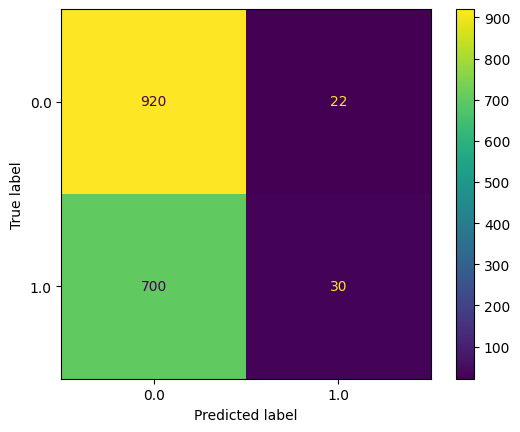

In [58]:
# построим график ConfusionMatrix
fig, ax= plt.subplots()
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, ax=ax)
plt.show()

In [59]:
#Вывод: Модель не является качественной. Наши данные не содержут всей необходимой информации (например: разбиение транзакций по категориям)

In [60]:
# Часть 2

In [61]:
df = transactions_df.drop('dt', axis=1)

df_pivot_table = pd.pivot_table(df, index =['user_id'],
                            columns =['type'],
                            values='value',
                            aggfunc='sum')
df_pivot_table = df_pivot_table.fillna(0)
df_pivot_table.reset_index(inplace=True)
result_df_2 = pd.merge(df_pivot_table, gender_df, how='left')
result_df_2

,user_id,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
0,22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
1,27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
2,28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
8352,99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
8353,99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0
8354,99991245,0.0,0.0,0.0,4446.915,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0


In [62]:
#проверим, что количество мужчин и женщин такое же, как в части 1
data = result_df_2.groupby('gender')[['gender']].count()
data.columns = ['gender']
fig = px.bar(data)
fig.show()

In [63]:
# определим признаки и целевые
Y_2 = result_df_2['gender']
X_2 = result_df_2.drop(['gender','user_id'], axis=1)

In [64]:
# разделим данные на тренировочные и тестовые
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, train_size=0.8)

In [65]:
#обучим модель
clf_2 = LogisticRegression()
clf_2.fit(X_train_2, np.ravel(Y_train_2))

LogisticRegression()

In [66]:
# получим предсказания
Y_pred_2 = clf_2.predict(X_test_2)
Y_pred_2

array([1., 1., 0., ..., 0., 1., 0.])

In [67]:
# посчитаем rog_auc
roc_auc_score(Y_test_2, Y_pred_2)

0.7024127832951362

In [68]:
# посчитаем accuracy
accuracy_score(Y_test_2, Y_pred_2)

0.7099282296650717

In [69]:
# посчитаем precision
precision_score(Y_test_2, Y_pred_2)

0.6930983847283406

In [70]:
# посчитаем recall
recall_score(Y_test_2, Y_pred_2)

0.6310160427807486

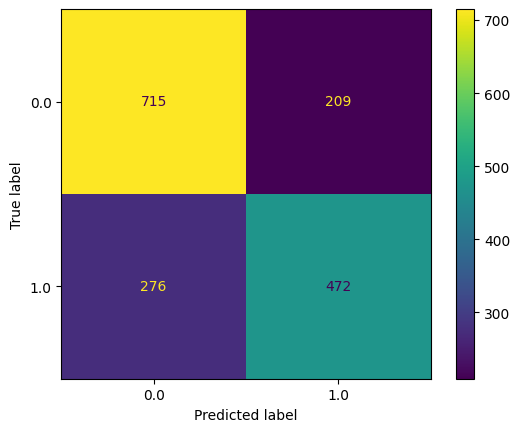

In [71]:
# построим график ConfusionMatrix
fig, ax= plt.subplots()
ConfusionMatrixDisplay.from_predictions(Y_test_2, Y_pred_2, ax=ax)
plt.show()